In [70]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy.stats as scs

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline


In [71]:
df = pd.read_csv('datawithnewcols.csv',index_col = 0)

In [72]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_lot15,Age_of_House,Years_last_renovation,basement,biggerliving,biggerlot,distance_from_seattle,distance_from_bellevue,distance_from_a_city,distance_from_airport
0,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7639,69,29,1,1,0,12.613856,15.150174,12.613856,30.859494
1,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,8062,87,87,0,0,1,16.333282,14.375822,14.375822,33.112379
2,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,5000,55,55,1,1,0,10.617501,17.522706,10.617501,10.988905
3,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,7503,33,33,0,0,1,21.759524,11.683886,11.683886,27.230991
4,7237550310,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,101930,19,19,1,1,0,25.295727,15.508940,15.508940,32.449837


In [73]:
df.shape

(19221, 30)

In [74]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'Age_of_House',
       'Years_last_renovation', 'basement', 'biggerliving', 'biggerlot',
       'distance_from_seattle', 'distance_from_bellevue',
       'distance_from_a_city', 'distance_from_airport'],
      dtype='object')

In [75]:
df.floors

0        2.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
19216    2.0
19217    3.0
19218    2.0
19219    2.0
19220    2.0
Name: floors, Length: 19221, dtype: float64

In [76]:
df.floors.value_counts()

1.0    9493
2.0    7350
1.5    1681
3.0     546
2.5     145
3.5       6
Name: floors, dtype: int64

In [77]:
categoricals = ['floors','view','condition','grade','waterfront','basement','zipcode']

In [78]:
numericals = ['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'sqft_living15',
 'sqft_lot15',
 'Age_of_House',
 'Years_last_renovation',
 'distance_from_a_city',
       'distance_from_airport']

In [79]:
df[numericals].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19221 entries, 0 to 19220
Data columns (total 11 columns):
price                    19221 non-null float64
bedrooms                 19221 non-null int64
bathrooms                19221 non-null float64
sqft_living              19221 non-null int64
sqft_lot                 19221 non-null int64
sqft_living15            19221 non-null int64
sqft_lot15               19221 non-null int64
Age_of_House             19221 non-null int64
Years_last_renovation    19221 non-null int64
distance_from_a_city     19221 non-null float64
distance_from_airport    19221 non-null float64
dtypes: float64(4), int64(7)
memory usage: 1.8 MB


In [80]:
totransform = ['bathrooms','bedrooms','distance_from_a_city','sqft_lot']

In [81]:
nottransform = ['Age_of_House','distance_from_airport','Years_last_renovation']

In [82]:
data_log = pd.DataFrame([])
for name in totransform:
    title = name + '_log'
    data_log[title] = df[name].map(lambda x: np.log(x))    
data_log

def normalize(feature):
    return (feature - feature.mean()) / feature.std()

data_log_norm = data_log.apply(normalize)
data_log_norm

,bathrooms_log,bedrooms_log,distance_from_a_city_log,sqft_lot_log
0,0.338160,-0.281249,0.030521,-0.115136
1,-1.728664,-1.713210,0.218200,0.242247
2,1.071378,0.734744,-0.216785,-0.525427
3,0.037966,-0.281249,-0.079409,0.006131
4,2.104790,0.734744,0.327101,2.813574
...,...,...,...,...
19216,0.606693,-0.281249,-0.920874,-2.022459
19217,0.606693,-0.281249,-0.277658,-2.171571
19218,0.606693,0.734744,-0.166045,-0.358569
19219,-2.461882,-1.713210,-1.982209,-1.975538


In [83]:
floor_dummies = pd.get_dummies(df['floors'], prefix='floor', drop_first=True)
view_dummies = pd.get_dummies(df['view'], prefix='view', drop_first=True)
cond_dummies = pd.get_dummies(df['condition'], prefix='cond', drop_first=True)
grade_dummies = pd.get_dummies(df['grade'], prefix='grade', drop_first=True)
water_dummies = pd.get_dummies(df['waterfront'], prefix='water', drop_first=True)
base_dummies = pd.get_dummies(df['basement'], prefix='base', drop_first=True)
zipcode_dummies = pd.get_dummies(df['zipcode'],prefix='zip',drop_first=True)

In [84]:
dfnew = pd.concat([data_log_norm,floor_dummies,view_dummies,cond_dummies,grade_dummies,water_dummies,base_dummies,zipcode_dummies],axis = 1)

In [85]:
datanottransform = df[nottransform].apply(normalize)

In [86]:
dfnew = pd.concat([dfnew,datanottransform],axis = 1)

In [91]:
dfnew.head()

,bathrooms_log,bedrooms_log,distance_from_a_city_log,sqft_lot_log,floor_1.5,floor_2.0,floor_2.5,floor_3.0,floor_3.5,view_1.0,...,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199,Age_of_House,distance_from_airport,Years_last_renovation,price
0,0.338160,-0.281249,0.030521,-0.115136,0,1,0,0,0,0,...,0,0,0,0,0,0,0.681982,0.961978,-0.622779,538000.0
1,-1.728664,-1.713210,0.218200,0.242247,0,0,0,0,0,0,...,0,0,0,0,0,0,1.294546,1.196583,1.379532,180000.0
2,1.071378,0.734744,-0.216785,-0.525427,0,0,0,0,0,0,...,0,0,0,0,0,0,0.205543,-1.107252,0.274809,604000.0
3,0.037966,-0.281249,-0.079409,0.006131,0,0,0,0,0,0,...,0,0,0,0,0,0,-0.543147,0.584123,-0.484689,510000.0
4,2.104790,0.734744,0.327101,2.813574,0,0,0,0,0,0,...,0,0,0,0,0,0,-1.019586,1.127589,-0.968005,1230000.0


In [88]:
dfnew['price'] = df.price

In [89]:
dfnew.head()

,bathrooms_log,bedrooms_log,distance_from_a_city_log,sqft_lot_log,floor_1.5,floor_2.0,floor_2.5,floor_3.0,floor_3.5,view_1.0,...,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199,Age_of_House,distance_from_airport,Years_last_renovation,price
0,0.338160,-0.281249,0.030521,-0.115136,0,1,0,0,0,0,...,0,0,0,0,0,0,0.681982,0.961978,-0.622779,538000.0
1,-1.728664,-1.713210,0.218200,0.242247,0,0,0,0,0,0,...,0,0,0,0,0,0,1.294546,1.196583,1.379532,180000.0
2,1.071378,0.734744,-0.216785,-0.525427,0,0,0,0,0,0,...,0,0,0,0,0,0,0.205543,-1.107252,0.274809,604000.0
3,0.037966,-0.281249,-0.079409,0.006131,0,0,0,0,0,0,...,0,0,0,0,0,0,-0.543147,0.584123,-0.484689,510000.0
4,2.104790,0.734744,0.327101,2.813574,0,0,0,0,0,0,...,0,0,0,0,0,0,-1.019586,1.127589,-0.968005,1230000.0


In [105]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [65]:
modeldata = ['distance_from_a_city','distance_from_airport','sqft_living','sqft_lot']

In [54]:
model2data = ['distance_from_a_city','Years_last_renovation','sqft_living','waterfront']

In [7]:
df1 = df[modeldata]

In [37]:
zipcode_dummies = pd.get_dummies(df['zipcode'],prefix='zip',drop_first=True)

In [39]:
df1= pd.concat([df[model2data],zipcode_dummies],axis = 1)

In [81]:
data_log = pd.DataFrame([])

for name in modeldata:
    title = name + '_log'
    data_log[title] = df[name].map(lambda x: np.log(x))    
data_log

def normalize(feature):
    return (feature - feature.mean()) / feature.std()

data_log_norm = data_log.apply(normalize)
data_log_norm

,distance_from_a_city_log,Age_of_House_log,bedrooms_log
1,0.016928,0.769485,-0.269661
2,0.206141,1.080199,-1.717736
3,-0.232398,0.465511,0.757765
4,-0.093899,-0.219216,-0.269661
5,0.315932,-0.959226,0.757765
...,...,...,...
21591,-0.942240,-1.575198,-0.269661
21592,-0.293768,-1.691831,-0.269661
21593,-0.181243,-2.504315,0.757765
21594,-2.012248,-1.691831,-1.717736


In [79]:
X = data_log
y = df['price']

In [40]:
X = dfnew[mode]
y = df['price']

In [55]:
X = df[model2data]
y = df['price']

In [90]:
X = dfnew[modeldata]
y = df['price']

KeyError: "['sqft_living', 'distance_from_a_city', 'sqft_lot'] not in index"

In [67]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.915
Model:                            OLS   Adj. R-squared (uncentered):              0.915
Method:                 Least Squares   F-statistic:                          5.137e+04
Date:                Mon, 01 Jun 2020   Prob (F-statistic):                        0.00
Time:                        22:24:40   Log-Likelihood:                     -2.5609e+05
No. Observations:               19002   AIC:                                  5.122e+05
Df Residuals:                   18998   BIC:                                  5.122e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
distance_from_a_city  -1.082e+04    117.293    -92.247      0.000    -1.1e+04   -1.06e+04
distance_from_airport  7139.2132    111.762     63.879      0.000    6920.150    7358.277
sqft_living             251.6047      1.176    213.996      0.000     249.300     253.909
sqft_lot                  0.2176      0.032      6.818      0.000       0.155       0.280
==============================================================================
Omnibus:                     5212.833   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26686.699
Skew:                           1.233   Prob(JB):                         0.00
Kurtosis:                       8.256   Cond. No.                     4.59e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [68]:
# Your code here - Remove features which do not appear to be statistically relevant
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

4 4
['distance_from_a_city', 'distance_from_airport', 'sqft_living', 'sqft_lot']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
distance_from_a_city,-1.082e+04,117.293,-92.247,0.0,-1.1e+04,-1.06e+04
distance_from_airport,7139.2132,111.762,63.879,0.0,6920.150,7358.277
sqft_living,251.6047,1.176,213.996,0.0,249.300,253.909
sqft_lot,0.2176,0.032,6.818,0.0,0.155,0.280


In [69]:
X = df[x_cols]
y= df['price']

In [70]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.915
Model:                            OLS   Adj. R-squared (uncentered):              0.915
Method:                 Least Squares   F-statistic:                          5.137e+04
Date:                Mon, 01 Jun 2020   Prob (F-statistic):                        0.00
Time:                        22:24:48   Log-Likelihood:                     -2.5609e+05
No. Observations:               19002   AIC:                                  5.122e+05
Df Residuals:                   18998   BIC:                                  5.122e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
distance_from_a_city  -1.082e+04    117.293    -92.247      0.000    -1.1e+04   -1.06e+04
distance_from_airport  7139.2132    111.762     63.879      0.000    6920.150    7358.277
sqft_living             251.6047      1.176    213.996      0.000     249.300     253.909
sqft_lot                  0.2176      0.032      6.818      0.000       0.155       0.280
==============================================================================
Omnibus:                     5212.833   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26686.699
Skew:                           1.233   Prob(JB):                         0.00
Kurtosis:                       8.256   Cond. No.                     4.59e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
# Your code here - Code a way to identify multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[x_cols]
vif = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
list(zip(x_cols,vif))

[('distance_from_a_city', 2.9533972206227617),
 ('distance_from_airport', 4.4685870040166735),
 ('sqft_living', 4.348297162247787),
 ('sqft_lot', 1.2054124308902214)]

In [49]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

4 4


In [50]:
X = df[x_cols]

In [51]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.914
Model:                            OLS   Adj. R-squared (uncentered):              0.914
Method:                 Least Squares   F-statistic:                          5.053e+04
Date:                Mon, 01 Jun 2020   Prob (F-statistic):                        0.00
Time:                        22:22:00   Log-Likelihood:                     -2.5624e+05
No. Observations:               19002   AIC:                                  5.125e+05
Df Residuals:                   18998   BIC:                                  5.125e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
distance_from_a_city -9188.1812    110.986    -82.787      0.000   -9405.724   -8970.639
Age_of_House          1767.5697     32.692     54.068      0.000    1703.491    1831.649
sqft_living            274.1775      1.015    270.151      0.000     272.188     276.167
waterfront            4.767e+05   1.72e+04     27.717      0.000    4.43e+05     5.1e+05
==============================================================================
Omnibus:                     2983.311   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12531.901
Skew:                           0.726   Prob(JB):                         0.00
Kurtosis:                       6.704   Cond. No.                     3.03e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [193]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

15 15
['bathrooms_log', 'bedrooms_log', 'distance_from_city_log', 'floor_1.5', 'floor_2.0']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
bathrooms_log,-5.437e+04,2759.808,-19.702,0.0,-5.98e+04,-4.9e+04
bedrooms_log,3.496e+04,2527.895,13.830,0.0,3e+04,3.99e+04
distance_from_city_log,-4.886e+04,2274.722,-21.479,0.0,-5.33e+04,-4.44e+04
floor_1.5,3.055e+05,7447.323,41.023,0.0,2.91e+05,3.2e+05
floor_2.0,5.039e+05,3926.002,128.347,0.0,4.96e+05,5.12e+05


In [194]:
X = dfnew[x_cols]

In [195]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.738
Model:                            OLS   Adj. R-squared (uncentered):              0.738
Method:                 Least Squares   F-statistic:                              3897.
Date:                Mon, 01 Jun 2020   Prob (F-statistic):                        0.00
Time:                        16:05:23   Log-Likelihood:                     -2.9113e+05
No. Observations:               20754   AIC:                                  5.823e+05
Df Residuals:                   20739   BIC:                                  5.824e+05
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
bathrooms_log          -5.437e+04   2759.808    -19.702      0.000   -5.98e+04    -4.9e+04
bedrooms_log            3.496e+04   2527.895     13.830      0.000       3e+04    3.99e+04
distance_from_city_log -4.886e+04   2274.722    -21.479      0.000   -5.33e+04   -4.44e+04
floor_1.5               3.055e+05   7447.323     41.023      0.000    2.91e+05     3.2e+05
floor_2.0               5.039e+05   3926.002    128.347      0.000    4.96e+05    5.12e+05
floor_3.0               4.303e+05   1.27e+04     33.788      0.000    4.05e+05    4.55e+05
view_1.0                2.867e+05   1.72e+04     16.641      0.000    2.53e+05     3.2e+05
view_2.0                2.524e+05   1.04e+04     24.234      0.000    2.32e+05    2.73e+05
view_3.0                3.703e+05   1.46e+04     25.373      0.000    3.42e+05    3.99e+05
view_4.0                5.673e+05   1.96e+04     28.907      0.000    5.29e+05    6.06e+05
grade_4                 1.691e+05    5.8e+04      2.916      0.004    5.54e+04    2.83e+05
grade_12                 8.75e+05   5.31e+04     16.464      0.000    7.71e+05    9.79e+05
water_True              1.179e+05   6471.472     18.226      0.000    1.05e+05    1.31e+05
base_True               3.558e+05   3797.244     93.699      0.000    3.48e+05    3.63e+05
distance_from_airport   6.178e+04   2122.990     29.100      0.000    5.76e+04    6.59e+04
==============================================================================
Omnibus:                     1879.749   Durbin-Watson:                   1.718
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4362.408
Skew:                           0.559   Prob(JB):                         0.00
Kurtosis:                       4.948   Cond. No.                         36.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [198]:
resids = model.resid

In [200]:
def plot_residuals(resids):
    plt.hist(resids)
    plt.title("Residuals")
    plt.show()
    
    xspace = np.linspace(0, 1, len(resids))
    plt.scatter(x, resids)
    plt.title("resids")
    plt.hlines(0, xmin=0, xmax=1)
    plt.show()

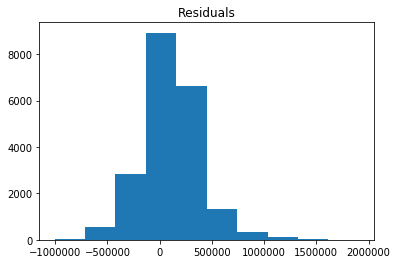

NameError: name 'x' is not defined

In [201]:
plot_residuals(resids)

In [202]:
finaldf = dfnew[x_cols]

In [206]:
finaldf['price']=dfnew['price']

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [208]:
finaldf.head()

,bathrooms_log,bedrooms_log,distance_from_city_log,floor_1.5,floor_2.0,floor_3.0,view_1.0,view_2.0,view_3.0,view_4.0,grade_4,grade_12,water_True,base_True,distance_from_airport,price
0,-1.725633,-0.263045,-0.327227,0,0,0,0,0,0,0,0,0,1,0,-1.391529,221900.0
1,0.381165,-0.263045,-0.282862,0,1,0,0,0,0,0,0,0,0,1,0.992174,538000.0
2,-1.725633,-1.715623,0.110589,0,0,0,0,0,0,0,0,0,0,0,1.229509,180000.0
3,1.128563,0.767575,-0.545192,0,0,0,0,0,0,0,0,0,0,1,-1.101136,604000.0
4,0.075164,-0.263045,0.547339,0,0,0,0,0,0,0,0,0,0,0,0.609922,510000.0


In [210]:
X = finaldf.drop(columns='price',axis=1)
y = finaldf['price']

In [211]:
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

from sklearn.metrics import r2_score

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [213]:
ols = LinearRegression(fit_intercept=False, normalize=False, n_jobs=-1)

In [214]:
ols.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=-1, normalize=False)

In [215]:
ols.coef_

array([-53332.5132314 ,  36172.48361048, -47234.35240599, 310484.13266737,
       501916.52704855, 434467.40154718, 278928.51987673, 254338.34851773,
       366880.15857828, 566205.4573405 , 174126.64140848, 884070.05869901,
       117738.89663688, 356520.35516341,  62293.37376362])

In [216]:
y_train_preds = ols.predict(X_train)
y_train_preds


array([443858.76562084, 493749.3453514 , 109642.63657952, ...,
        93883.35178784, 478668.88883879,  69928.77523556])

In [217]:
r2_score(y_train, y_train_preds)

-0.13966763739390875

In [218]:
def get_score(model ,X_train, y_train):
    y_train_preds = model.predict(X_train)

In [219]:
# r2 
training_score = ols.score(X_train, y_train)
# ols.score is calculating the y_train_preds and then using those to get the r2 score
training_score

-0.13966763739390875

In [220]:
testing_score = ols.score(X_test, y_test)
testing_score

-0.13586864337811644

In [221]:
# cv = 5 means 80/20 splits
# cv = 10 means 90/10 splits
# cv = 3 means 67/33 splits

cv_scores = cross_val_score(ols, X, y, scoring='r2', cv=5, n_jobs=-1) 
# cv breaks your data into that many equal pieces 
cv_scores

array([-0.15329018, -0.16789171, -0.14617542, -0.07656858, -0.21379668])

In [230]:
rfe = RFE(ols, n_features_to_select=15, step=1, verbose=2)

In [231]:
X_all = finaldf.drop(columns=['price'])
rfe.fit(X_all, y)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=False, n_jobs=-1,
                               normalize=False),
    n_features_to_select=15, step=1, verbose=2)

In [232]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [233]:
new_cols = X_all.columns[rfe.support_]

In [234]:
new_cols

Index(['bathrooms_log', 'bedrooms_log', 'distance_from_city_log', 'floor_1.5',
       'floor_2.0', 'floor_3.0', 'view_1.0', 'view_2.0', 'view_3.0',
       'view_4.0', 'grade_4', 'grade_12', 'water_True', 'base_True',
       'distance_from_airport'],
      dtype='object')